# Logistic Regression

## Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Collection and Allocation

In [2]:
data = pd.read_csv('diabetes2.csv')

#training data (80%)
train = data.sample(frac = 0.8)
X_train = train.iloc[:,:8]
y_train = train.iloc[:,8]

#testing data (20%)
test = data.loc[data.index.difference(train.index)]
X_test = test.iloc[:,:8]
y_test = test.iloc[:,8]

## Logistic Regression Class

In [3]:
class LogReg:
    def __init__(self,lr,epochs):
        self.lr = lr;
        self.epochs = epochs
        self.teetha = None 
        self.bias = None
        self.loss = np.zeros(epochs//100 + 1)
        self.acc = np.zeros(epochs//100 + 1)
        
    #fitting for the LR model
    def fit(self,X,y):
        samples, features = X.shape
        self.teetha = np.zeros(features)
        self.bias = 0

        #gradient descent method
        for i in range(self.epochs+1):
            #logistic 
            linear = (X @ self.teetha) + self.bias
            y_pred = self._sigmoid(linear)
            
            #loss rates
            dt = (1/samples) * (X.T @ (y_pred-y))
            db = (1/samples) * np.sum(y_pred-y)
            
            #updating values
            self.teetha -= self.lr * dt
            self.bias -= self.lr * db
            
            #printing training after every 100 epochs
            if  i%100 == 0:
                
                #loss
                self.loss[i//100]  = (1/samples)*(((-y).T @ np.log(y_pred))-((1-y).T @ np.log(1-y_pred)))
                
                #accuracy
                self.acc[i//100] = (1/samples) * np.sum(abs(self.prediction(X)==y))
                
                #
                print('Epoch',i,': (Loss: ',self.loss[i//100],',Correctness: ',format(self.acc[i//100],"0.3f"),')')
        
        
    #prediction
    def prediction(self,X):
        linear = (X @ self.teetha)+self.bias
        y_pred = self._sigmoid(linear)
        y_binary = [1 if i>0.5 else 0 for i in y_pred]
        
        return y_binary
    
    #to 
    def _sigmoid(self, x):
        return 1/(1+np.exp(-x))


## Control Variables and Model fitting

In [4]:
lr = 0.00001
epochs = 5000

#initializing model
model = LogReg(lr,epochs)

#model fitting/training
model.fit(X_train,y_train)

Epoch 0 : (Loss:  0.6931471805599455 ,Correctness:  0.629 )
Epoch 100 : (Loss:  0.6697867690333147 ,Correctness:  0.630 )
Epoch 200 : (Loss:  0.6632670113794674 ,Correctness:  0.634 )
Epoch 300 : (Loss:  0.6581967533152298 ,Correctness:  0.632 )
Epoch 400 : (Loss:  0.6541696669160761 ,Correctness:  0.635 )
Epoch 500 : (Loss:  0.6509551859026079 ,Correctness:  0.638 )
Epoch 600 : (Loss:  0.6483758524593684 ,Correctness:  0.638 )
Epoch 700 : (Loss:  0.6462943970815688 ,Correctness:  0.642 )
Epoch 800 : (Loss:  0.6446046698852304 ,Correctness:  0.643 )
Epoch 900 : (Loss:  0.6432244554772969 ,Correctness:  0.650 )
Epoch 1000 : (Loss:  0.6420898910432337 ,Correctness:  0.648 )
Epoch 1100 : (Loss:  0.6411511854555644 ,Correctness:  0.647 )
Epoch 1200 : (Loss:  0.640369357275107 ,Correctness:  0.647 )
Epoch 1300 : (Loss:  0.6397137547631236 ,Correctness:  0.651 )
Epoch 1400 : (Loss:  0.6391601695726656 ,Correctness:  0.656 )
Epoch 1500 : (Loss:  0.6386893988225444 ,Correctness:  0.660 )
Epoch

## Model Prediction and Accuracy


In [5]:
#prediction
y_pred = model.prediction(X_test)

#accuracy calculation
corr = np.sum(y_pred==y_test)
total = len(y_test)

print(corr,'/',total,'(',format((corr/total)*100,"0.2f"),'%)')

115 / 154 ( 74.68 %)


## Plotting Error and Accuracy

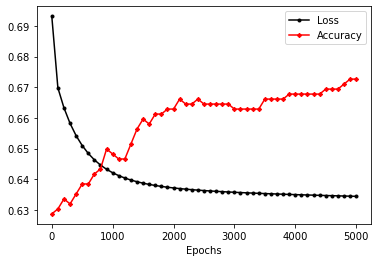

In [7]:
plt.plot(range(0,epochs+1,100),model.loss,'ko-',markersize=3)
plt.xlabel('Epochs')
plt.plot(range(0,epochs+1,100),model.acc,'rD-',markersize= 3)
plt.legend(['Loss','Accuracy'])

# plt.savefig("error_acc_plot.jpg")